In [1]:
%%cython
cdef extern from "lw_drobyshev_task.c":
    # расчет итерациями запаздывающего момента
    double tlag(long double x, long double y, long double z, long double t, 
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap))
    # отношение радиуса Лиенара Вихерта к радиусу
    double klw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap))
    # Радиус Лиенара Вихерта
    double Rlw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap))
    
    
    # phi_lw - скалярный потенциал Лиенара Вихерта
    double philw(long double x, long double y, long double z, long double t,
               long double (*Coordinate)(long double t_zap),
               long double (*Coordinate)(long double t_zap),
               long double (*Coordinate)(long double t_zap),
               long double (*Velocity)(long double t_zap),
               long double (*Velocity)(long double t_zap),
               long double (*Velocity)(long double t_zap),
               long double q)


    # A_lw - векторный потенциал Лиенара Вихерта
    void Alw(long double x, long double y, long double z, long double t,
             long double (*Coordinate)(long double t_zap),
             long double (*Coordinate)(long double t_zap),
             long double (*Coordinate)(long double t_zap),
             long double (*Velocity)(long double t_zap),
             long double (*Velocity)(long double t_zap),
             long double (*Velocity)(long double t_zap),
             long double q,
             long double * A_x, long double * A_y, long double * A_z
           )
    
    void electr_magnet(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Acceleration)(long double t_zap),
                long double (*Acceleration)(long double t_zap),
                long double (*Acceleration)(long double t_zap),
                long double q,
                long double * E_x, long double * E_y, long double * E_z,
                long double * B_x, long double * B_y, long double * B_z)

    void set_c(long double _c)

cdef extern from "lw_drobyshev_task_tensor.c":
    int spherical_x_ccalc_Maxwells_stress_tensor_R_t(long double xc,
        long double theta, long double varphi, long double t,
        long double (*Coordinate)(long double t_zap),
        long double (*Coordinate)(long double t_zap),
        long double (*Coordinate)(long double t_zap),
        long double (*Velocity)(long double t_zap),
        long double (*Velocity)(long double t_zap),
        long double (*Velocity)(long double t_zap),
        long double (*Acceleration)(long double t_zap),
        long double (*Acceleration)(long double t_zap),
        long double (*Acceleration)(long double t_zap),
        long double * pTxn, long double * pTyn, long double * pTzn,
        long double * pNx, long double * pNy, long double * pNz,
        long double * pSn,
        long double * pEn,
        long double * pHn,
        long double * pAn)
    
    void cset_sphere_R(long double R);
    long double cget_sphere_R();

# Drobyshev's test
# Как запаздывающий Лиенар-Вихерт становится "незапаздывающим". Визуализация
# http://www.sciteclibrary.ru/cgi-bin/yabb2/YaBB.pl?num=1528093569/0

import numpy as np
cdef long double c = np.float128(1)
cdef long double vk = np.float128(0.84) # finish velocity
cdef long double a = np.float128(0.3)   # acseleration
cdef long double t0 = vk/a # time of acseleration

cdef long double sx(long double t):
    cdef long double result
    result = (0 if t < 0 else (a * t*t / 2 if t < t0 else vk * t - a * t0*t0 / 2))
    return result
cdef long double sy(long double t):
    cdef long double result
    result = 0
    return result
cdef long double sz(long double t):
    cdef long double result
    result = 0
    return result

cdef long double vx(long double t):
    cdef long double result
    result = (0 if t < 0 else (a * t       if t < t0 else vk))
    return result
cdef long double vy(long double t):
    cdef long double result
    result = 0
    return result
cdef long double vz(long double t):
    cdef long double result
    result = 0
    return result


cdef long double wx(long double t):
    cdef long double result
    result = (0 if t < 0 else (a           if t < t0 else 0))
    return result
cdef long double wy(long double t):
    cdef long double result
    result = 0
    return result
cdef long double wz(long double t):
    cdef long double result
    result = 0
    return result

def R_lw(x, y, z, t):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))
    set_c(1.0)
    cdef long double r_lw = Rlw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz)

    return r_lw

def phi_lw(x, y, z, t, q):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef double ta = t
    set_c(1.0)
    cdef long double q_ = q
    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))
    set_c(1.0)
    cdef long double philw_ = philw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, q_)

    return philw_


def A_lw(x, y, z, t, q):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    set_c(1.0)
    cdef long double q_ = q
    
    cdef long double A_x
    cdef long double A_y
    cdef long double A_z
    
    Alw(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz,
                  q_,
                  &A_x, &A_y, &A_z)

    return (A_x, A_y, A_z)

def EB_lw(x, y, z, t, q):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    set_c(1.0)
    cdef long double q_ = q
    
    cdef long double E_x
    cdef long double E_y
    cdef long double E_z
    cdef long double B_x
    cdef long double B_y
    cdef long double B_z
    
    electr_magnet(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz, wx, wy, wz,
                  q_,
                  &E_x, &E_y, &E_z, &B_x, &B_y, &B_z)

    return (E_x, E_y, E_z, B_x, B_y, B_z)

def t_lag(x, y, z, t):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    set_c(1.0)
    cdef long double q = 1
    # расчет итерациями запаздывающего момента
    cdef long double lag = tlag(Xa, Ya, Za, ta, sx, sy, sz)
    return lag



def spherical_x_calc_En_R_t (xc, theta, varphi, t, to_throw=True) :
    cdef long double _xc = xc
    cdef long double _theta = theta
    cdef long double _varphi = varphi
    cdef long double _t = t

    cdef long double Txn
    cdef long double Tyn
    cdef long double Tzn
    cdef long double Nx
    cdef long double Ny
    cdef long double Nz
    cdef long double Sn
    cdef long double En
    cdef long double Hn
    cdef long double An
    
    ret = spherical_x_ccalc_Maxwells_stress_tensor_R_t(_xc, _theta, _varphi, _t,
                  sx, sy, sz, vx, vy, vz, wx, wy, wz,
        &Txn,
        &Tyn,
        &Tzn,
        &Nx,
        &Ny,
        &Nz,
        &Sn,
        &En,
        &Hn,
        &An)

    if (to_throw):
        if 0 != ret:
            print(ret, theta, varphi, t)
            raise Exception("Accuracy error")

        return np.float128(En)
    return np.float128(En), ret

def set_sphere_R(R):
    cset_sphere_R(R)
def get_sphere_R():
    return cget_sphere_R()

def get_sx(t):
    cdef long double _t = t
    cdef long double result = sx(_t)
    return result
    

In [2]:
t_cur =  7.5

In [3]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

xa_linspace = np.linspace(np.float128(-5), np.float128(+10), 30*4)
ya_linspace = np.linspace(np.float128(-10), np.float128(+10), 20*4)

xa_list = xa_linspace.tolist()
ya_list = ya_linspace.tolist()

xa_grid,ya_grid = np.meshgrid(xa_linspace, ya_linspace)

u_ = xa_grid * np.nan
v_ = ya_grid * np.nan
e_ = xa_grid * np.nan

t_ = ya_grid * np.nan
rlw_ = ya_grid * np.nan
s_ = ya_grid * np.nan
bz_ = ya_grid * np.nan

ax_ = ya_grid * np.nan

sx_ = ya_grid * np.nan
sy_ = ya_grid * np.nan
sz_ = ya_grid * np.nan

bz_min = +np.finfo(np.float64).max
bz_max = -np.finfo(np.float64).max

sx_min = +np.finfo(np.float64).max
sx_max = -np.finfo(np.float64).max

sy_min = +np.finfo(np.float64).max
sy_max = -np.finfo(np.float64).max


q = 1

#def make_R():
for ix in np.arange(0, len(xa_linspace), 1):
    for iy in np.arange(0, len(ya_linspace), 1):

        Xa = xa_list[ix]
        Ya = ya_list[iy]
        Za = 0.0
        R = R_lw(Xa, Ya, Za, t_cur)
        rlw_[iy][ix] = R

        (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_cur, q)
        (A_x, A_y, A_z) = A_lw(Xa, Ya, Za, t_cur, q)
        # The Poynting vector S is defined as to be equal
        # to the cross product (1/μ)E × B
        S_x = E_y * B_z - E_z * B_y
        S_y = E_z * B_x - E_x * B_z
        S_z = E_x * B_y - E_y * B_x
        sx_[iy][ix] = S_x
        sy_[iy][ix] = S_y
        sz_[iy][ix] = S_z
        
        ax_[iy][ix] = A_x

        if sx_min > S_x:
            sx_min = S_x
        if sx_max < S_x:
            sx_max = S_x        

        if sy_min > S_y:
            sy_min = S_y
        if sy_max < S_y:
            sy_max = S_y


        u_[iy][ix] = E_x
        v_[iy][ix] = E_y
        e_[iy][ix] = sqrt(E_x*E_x + E_y*E_y)

        t2 = t_lag(Xa, Ya, 0, t_cur)
        t_[iy][ix] = t2


        phi_ = phi_lw(Xa, Ya, 0, t_cur, q)
        s_[iy][ix] = phi_
        bz_[iy][ix] = B_z
        if bz_min > B_z:
            bz_min = B_z
        if bz_max < B_z:
            bz_max = B_z

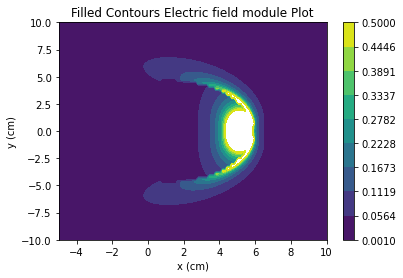

In [23]:
levels = np.linspace(0.001, 0.5, 10)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, e_, levels = levels)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Electric field module Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

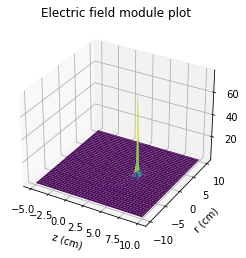

In [5]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(xa_grid,ya_grid, e_, cmap='viridis', edgecolor='none')
ax.set_title('Electric field module plot')
plt.show()

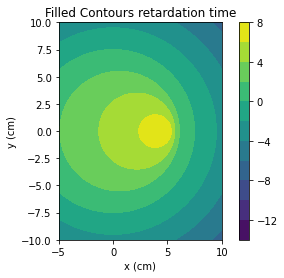

In [6]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, t_, levels = np.linspace(-14, 8, 22/2+1))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours retardation time')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

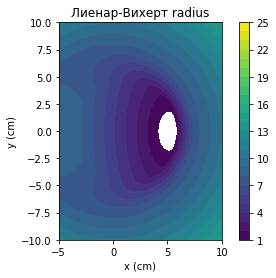

In [7]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, rlw_, levels = np.linspace(1, 25, 24/1+1))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Лиенар-Вихерт radius')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

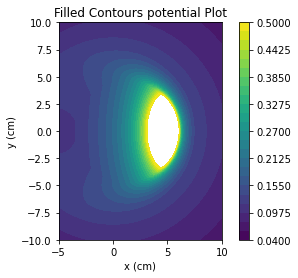

In [8]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, s_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours potential Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

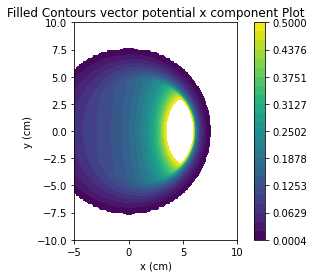

In [9]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, ax_, levels = np.linspace(0.0004, 0.5, int((1-0.04)/0.04+1)))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential x component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

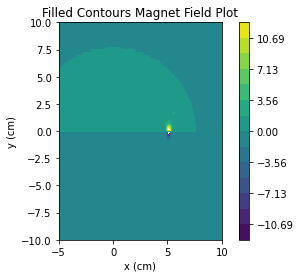

In [10]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, bz_, levels = np.linspace(bz_min/5, bz_max/5, 15))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Magnet Field Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

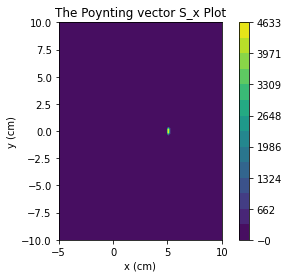

In [11]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, sx_, levels = np.linspace(sx_min, sx_max, 15))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('The Poynting vector S_x Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

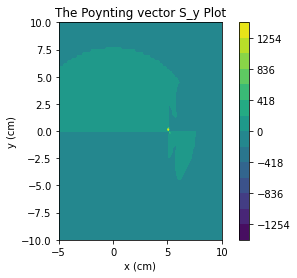

In [12]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, sy_, levels = np.linspace(sy_min, sy_max, 15))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('The Poynting vector S_y Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

In [13]:
# радиус сферы интегрирования
R = 4

set_sphere_R(R)

get_sphere_R(), R, R^2

(4.0, 4, 16)

In [14]:
get_sx(t_cur)

5.124

In [15]:
spherical_x_calc_En_R_t(xc = get_sx(t_cur),
        theta = pi/4, varphi = 0.2, t = t_cur)

0.14343239910414817828

In [16]:
from scipy import integrate as scipy_integrate

En_x_t = lambda t : scipy_integrate.nquad( \
    lambda theta, varphi : 
    spherical_x_calc_En_R_t(xc = get_sx(t),
        theta = theta, varphi = varphi, t = t), \
    [ [0, np.float128(pi)],  [0, np.float128(2*pi)]])
#            theta,             varphi

In [17]:
En_x_t = lambda ti : scipy_integrate.nquad( \
    lambda theta, varphi : 
    spherical_x_calc_En_R_t(xc = 0,
        theta = theta, varphi = varphi, t = ti), \
    [ [0, np.float128(pi)],  [0, np.float128(2*pi)]])
#            theta,             varphi

In [18]:
En_x_theta = lambda theta, ti : scipy_integrate.nquad( \
    lambda  varphi : 
    spherical_x_calc_En_R_t(xc = 0,
        theta = theta, varphi = varphi, t = ti), \
    [ [0, np.float128(2*pi)]])
#            theta,             varphi

In [19]:
x_intEn = []
for ti in np.arange(0.00, 20, 0.1):
    int_En = (En_x_t(ti)[0]/(4*pi)).n()
    #print(ti, get_sx(ti), int_En)
    x_intEn += [(get_sx(ti), int_En)]

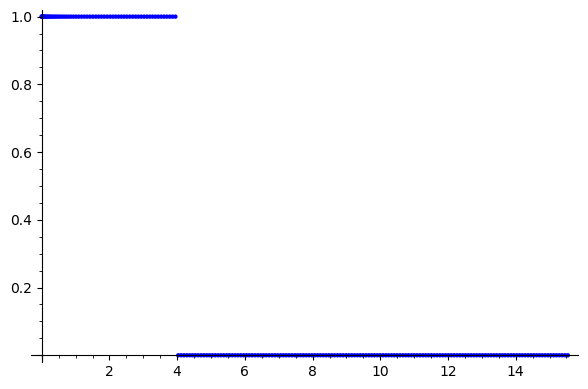

In [20]:
list_plot(x_intEn)

In [21]:
theta_x_steps_number = 360            # разбиваем период на шаги
dtheta_x = pi / theta_x_steps_number  # длительность шага

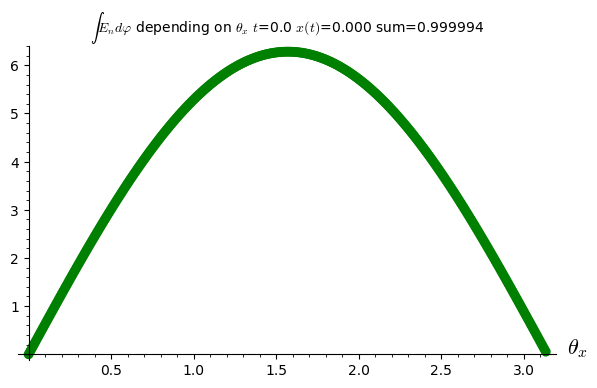

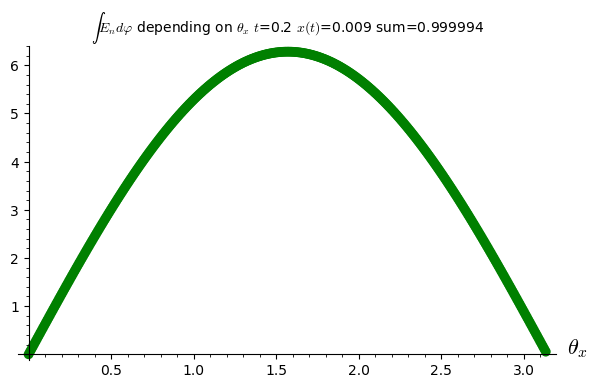

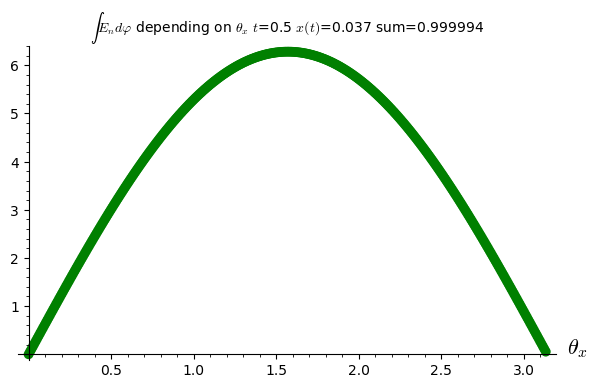

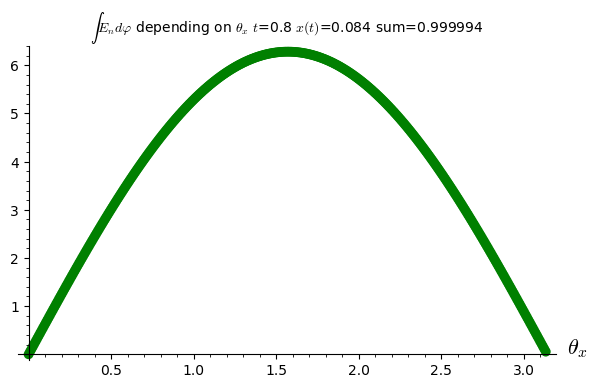

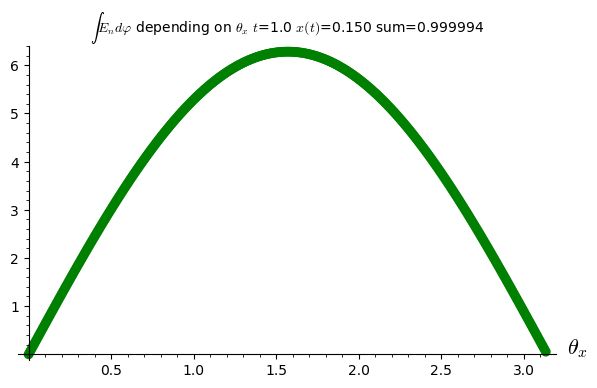

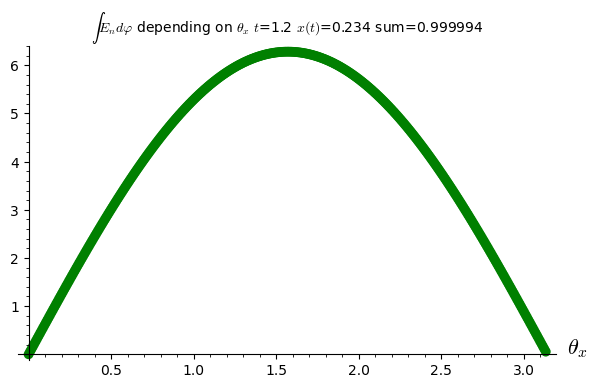

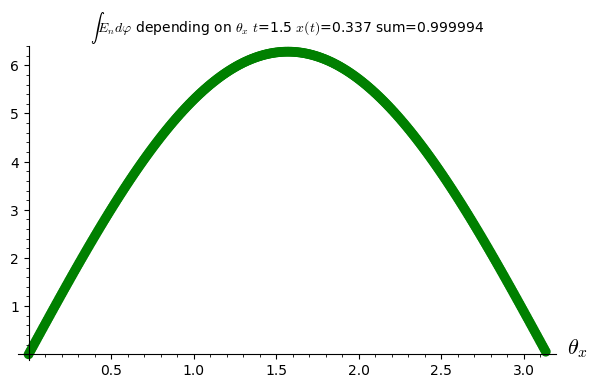

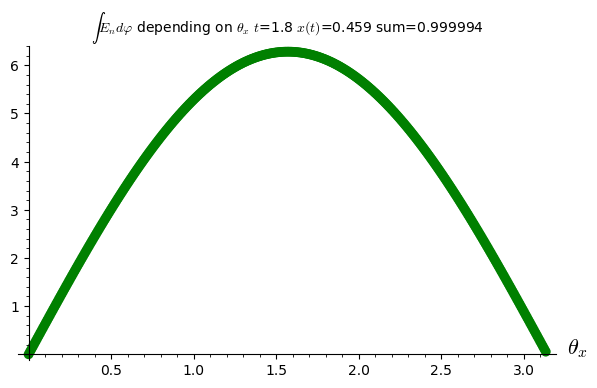

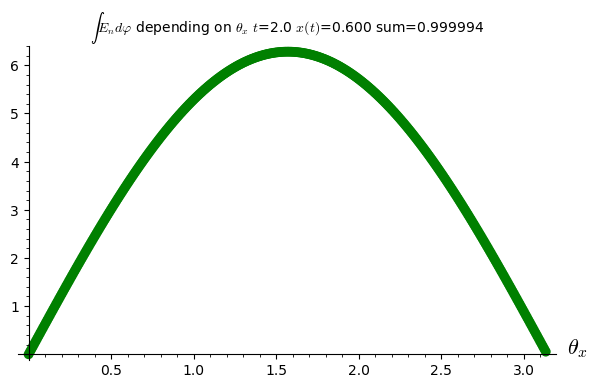

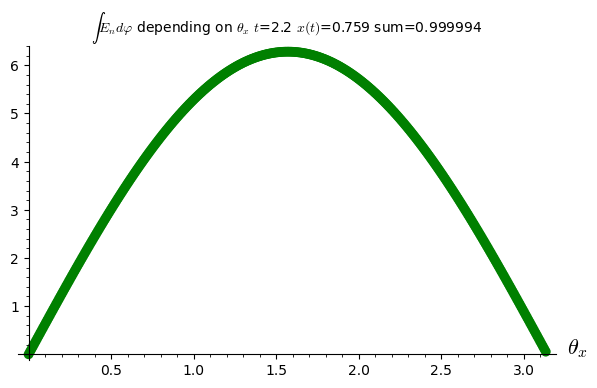

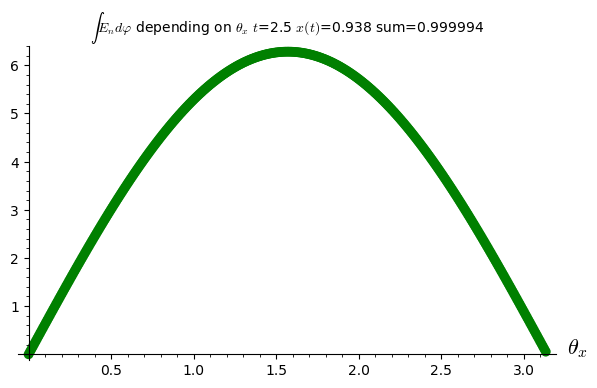

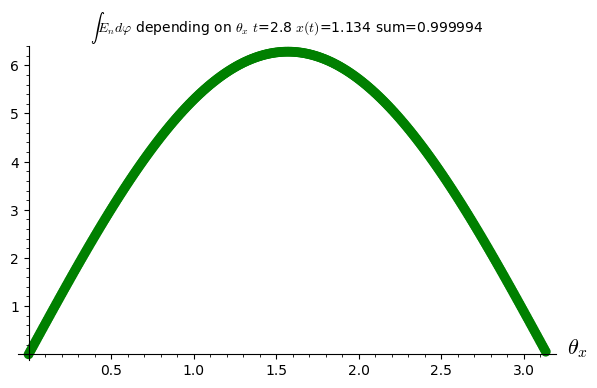

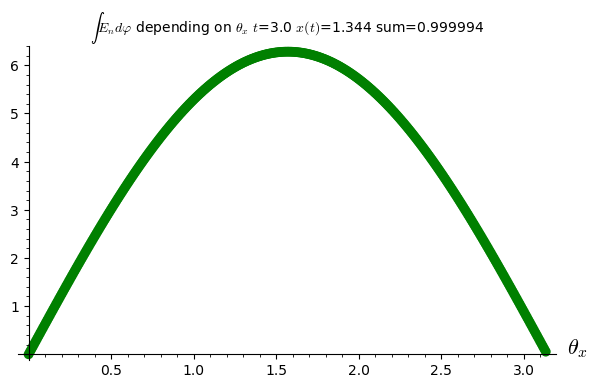

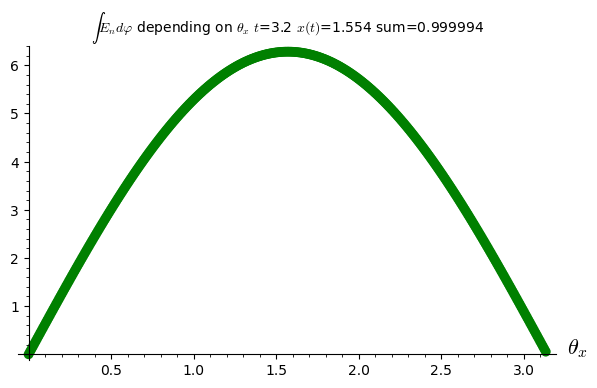

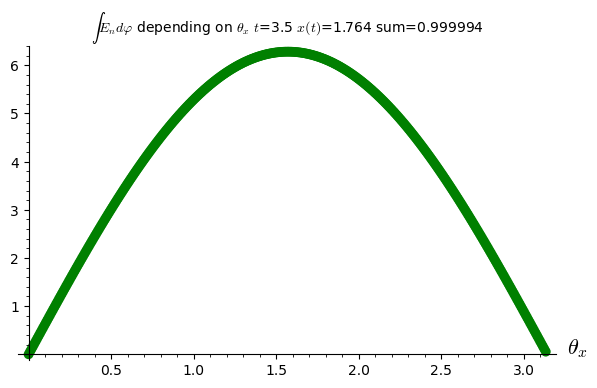

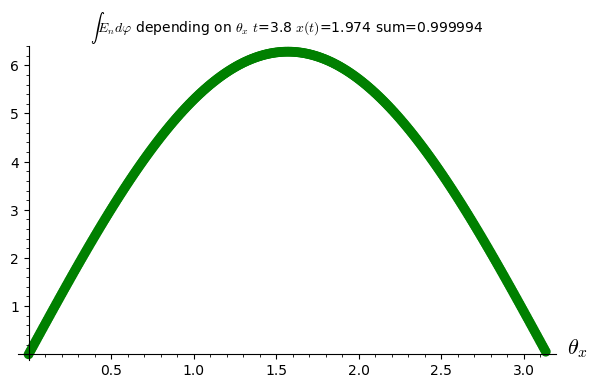

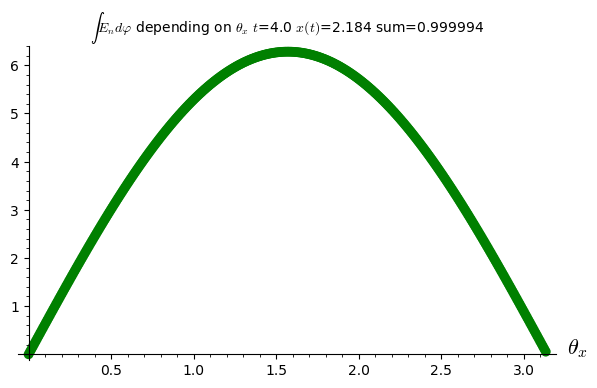

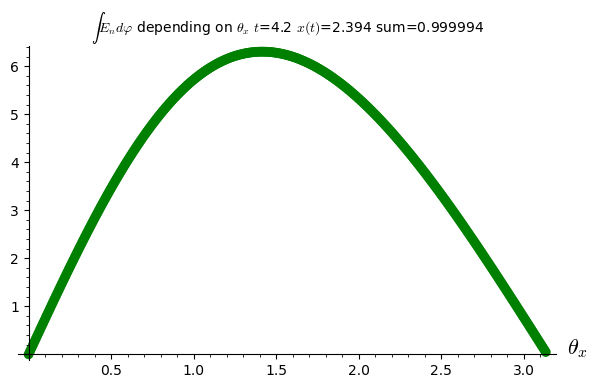

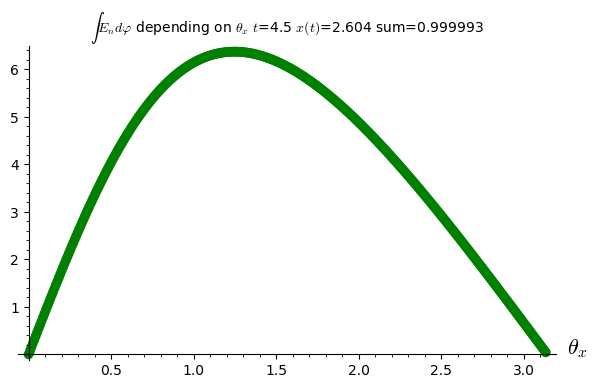

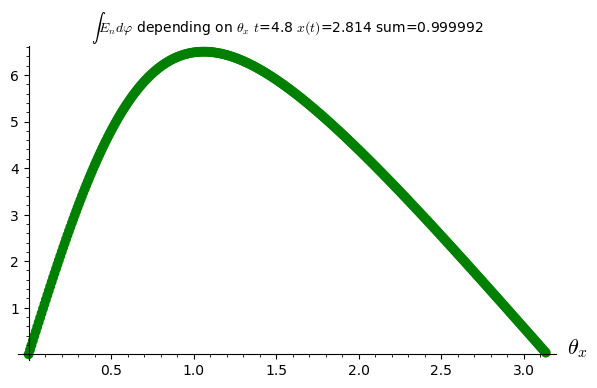

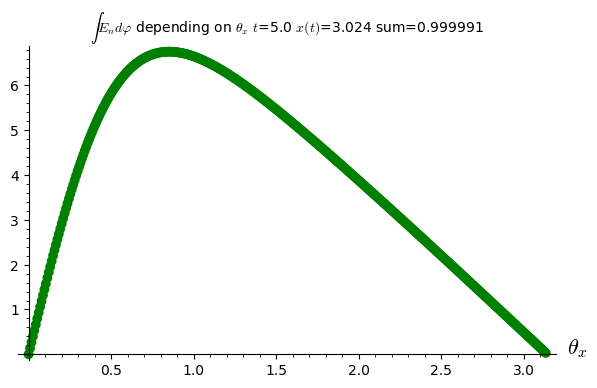

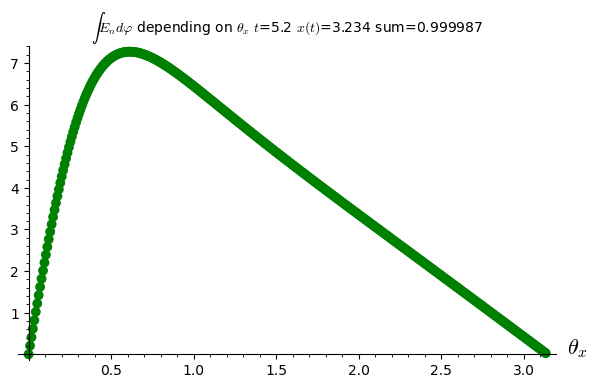

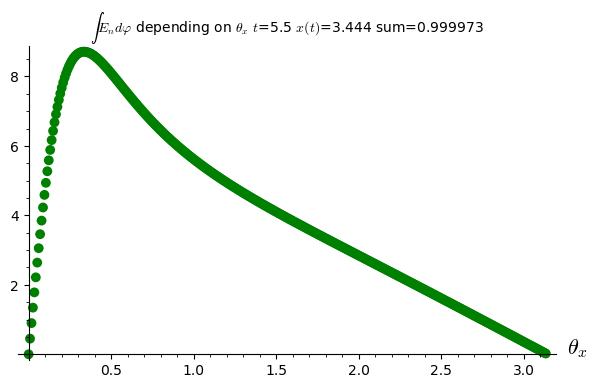

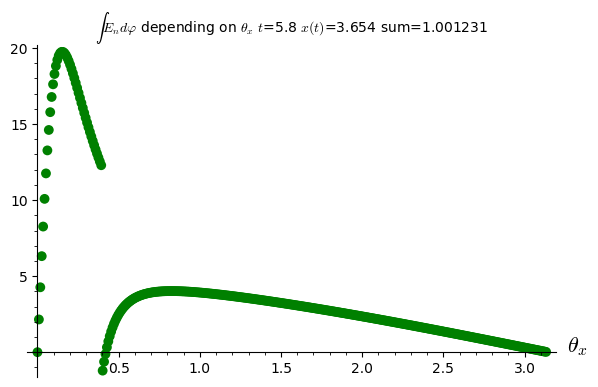

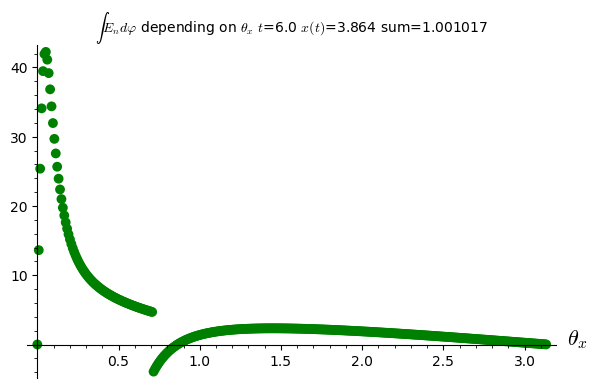

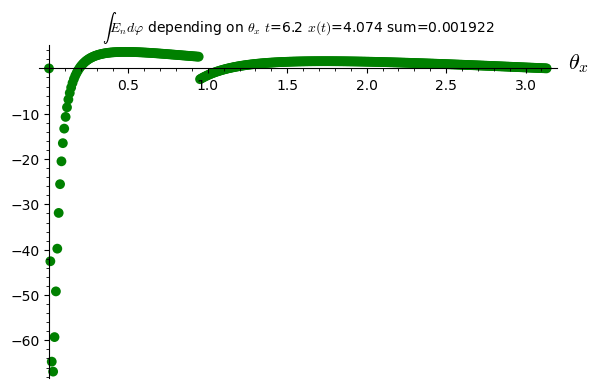

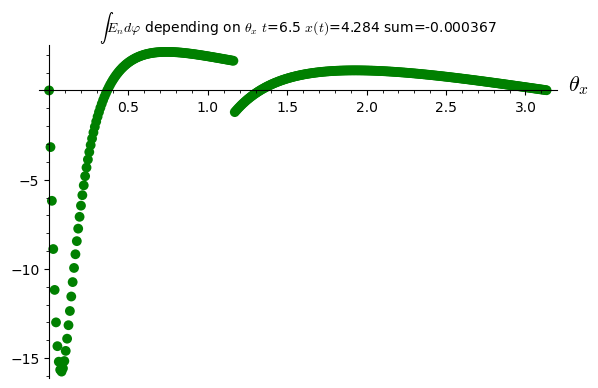

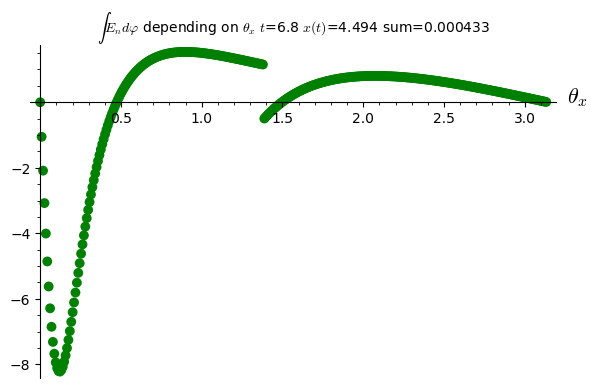

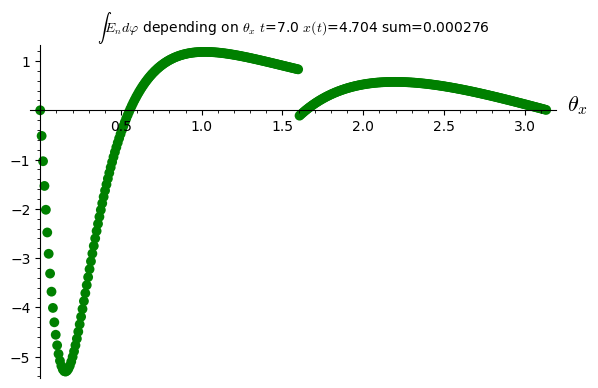

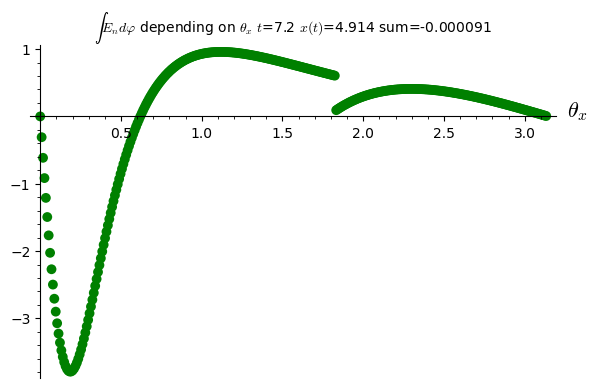

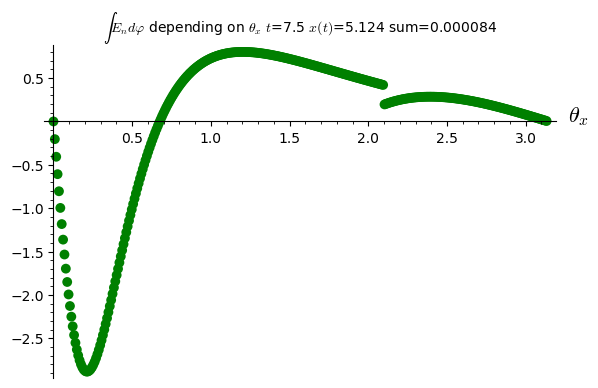

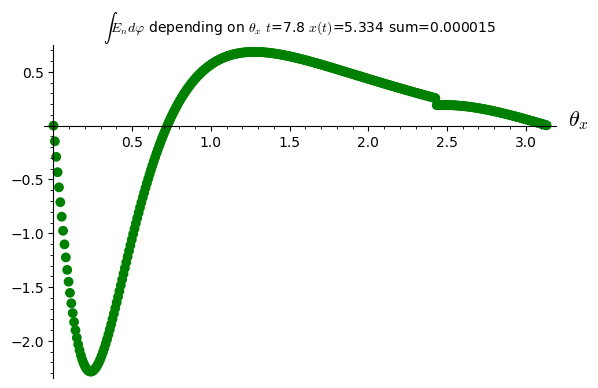

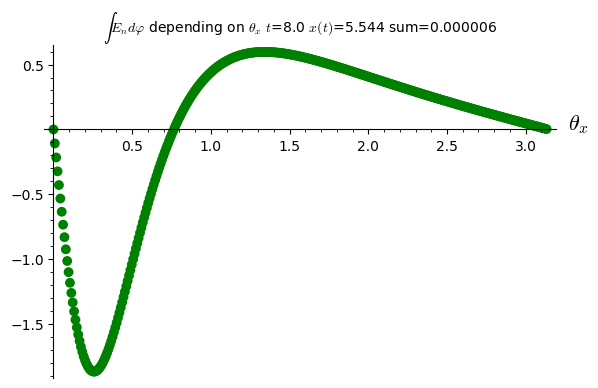

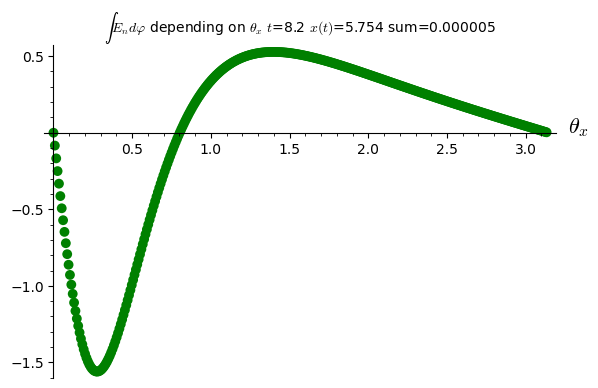

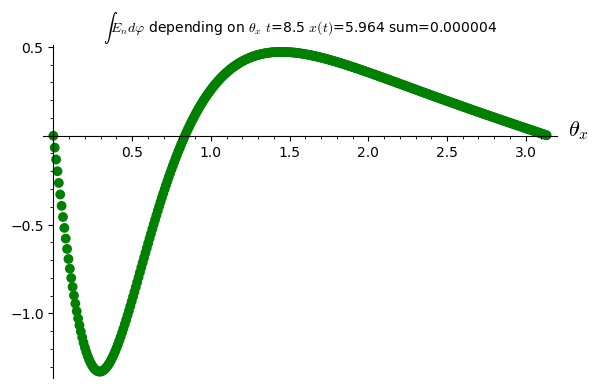

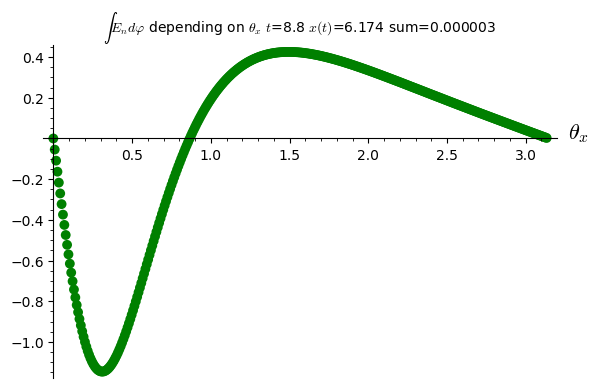

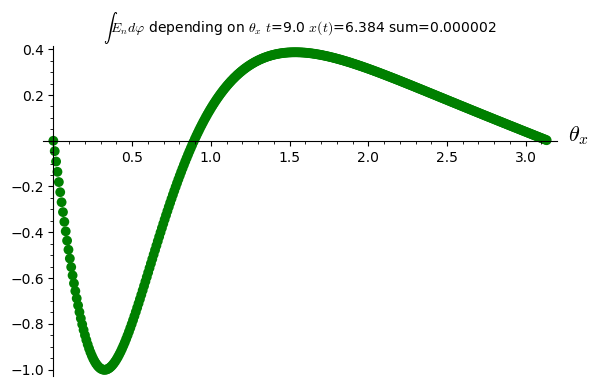

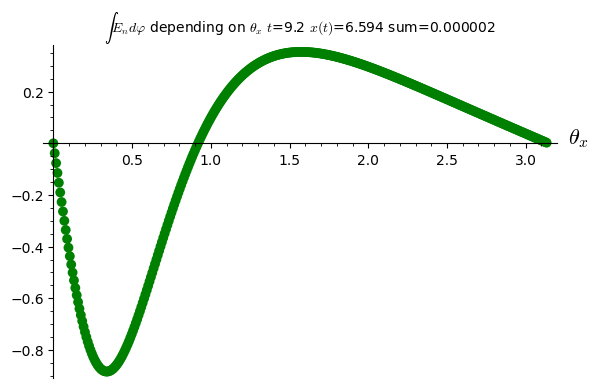

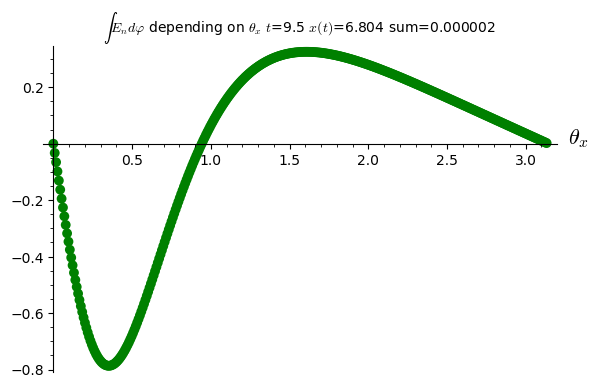

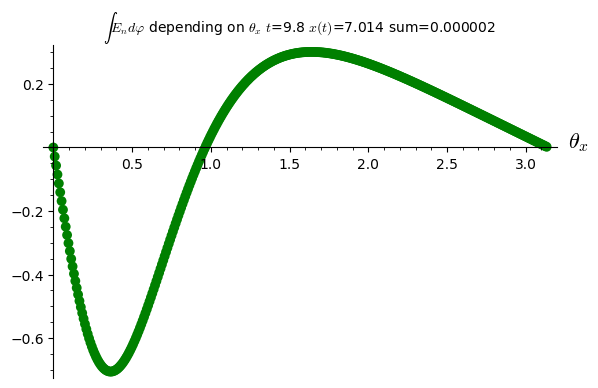

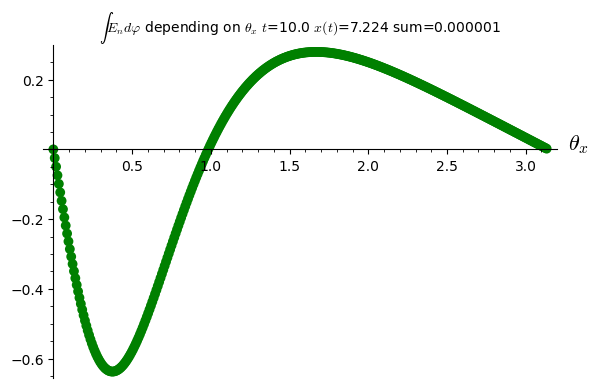

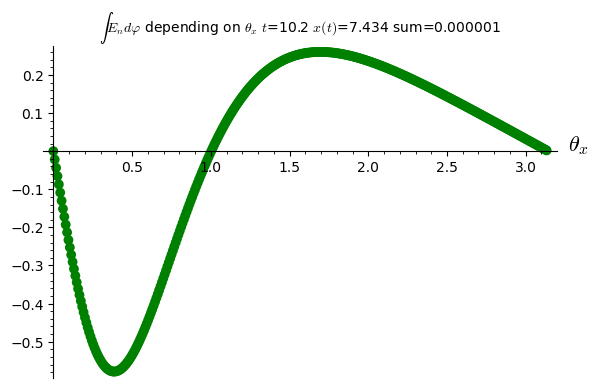

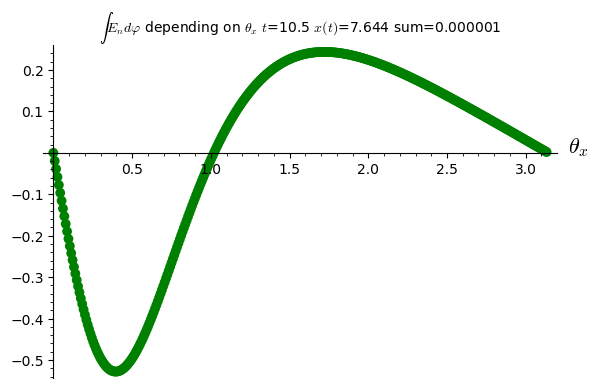

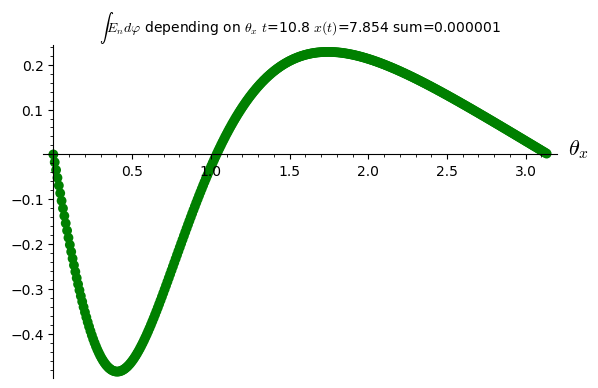

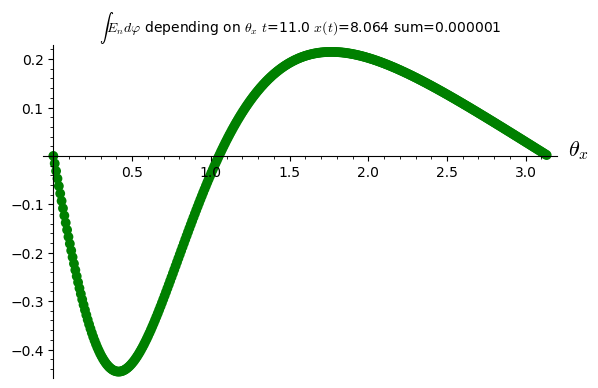

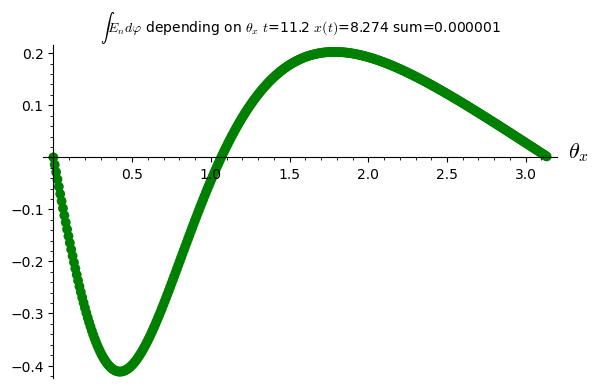

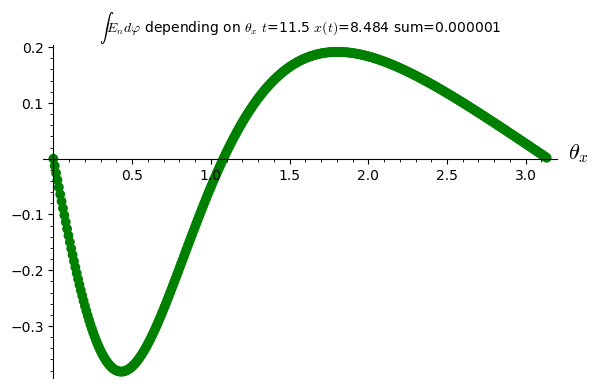

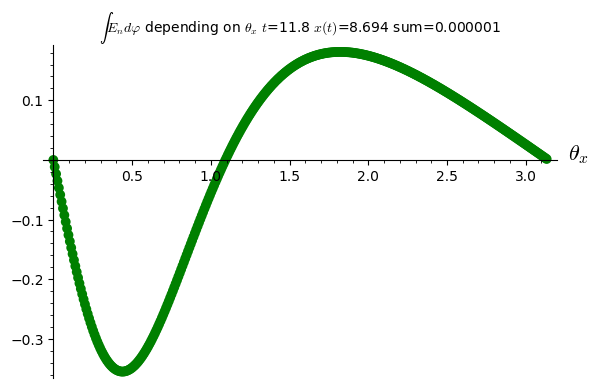

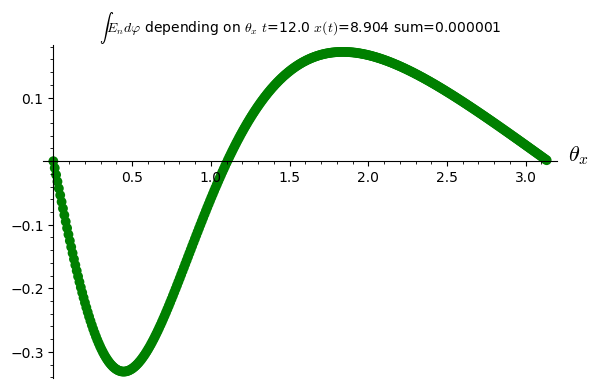

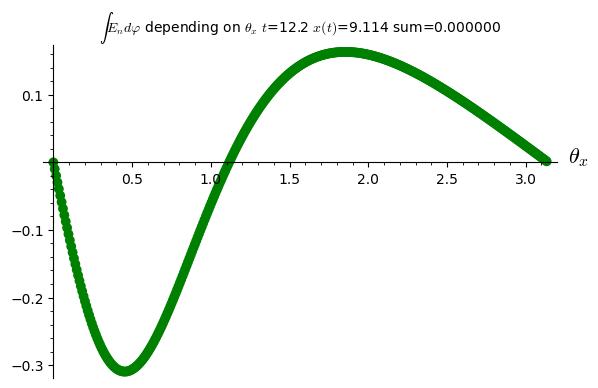

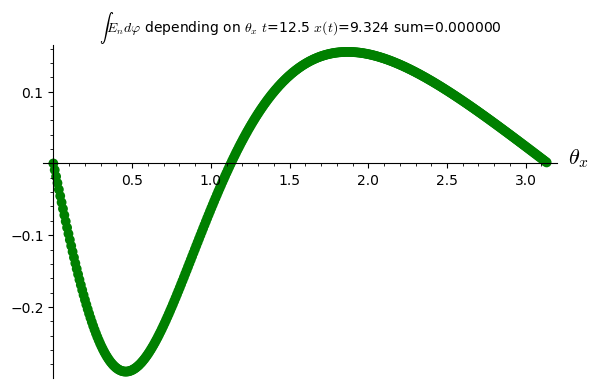

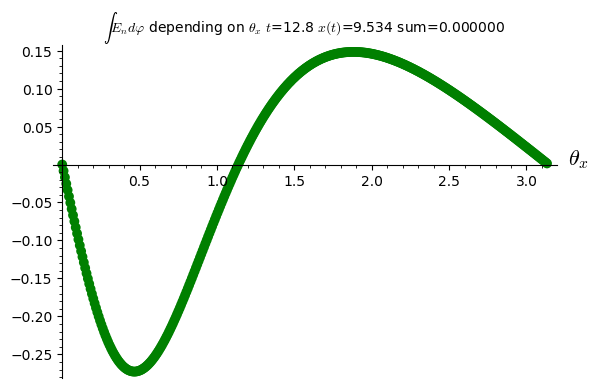

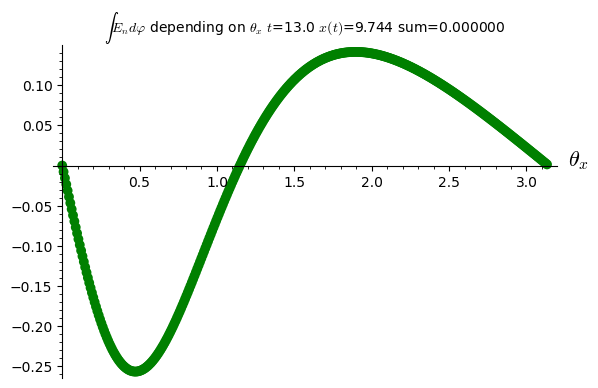

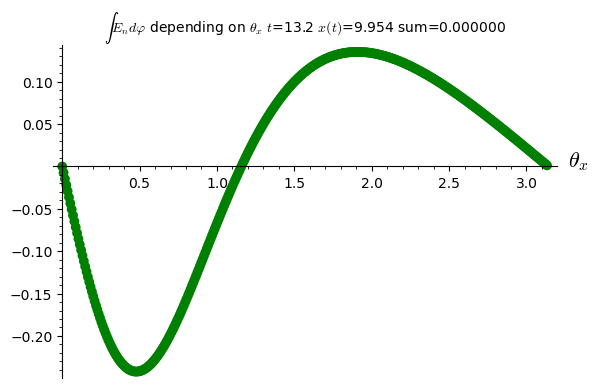

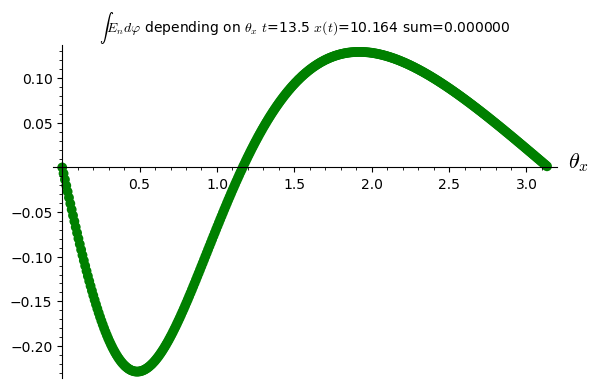

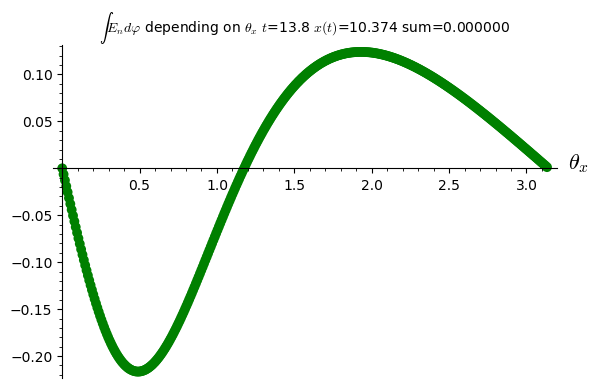

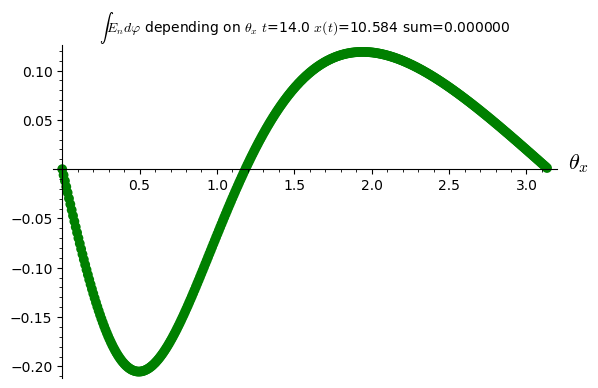

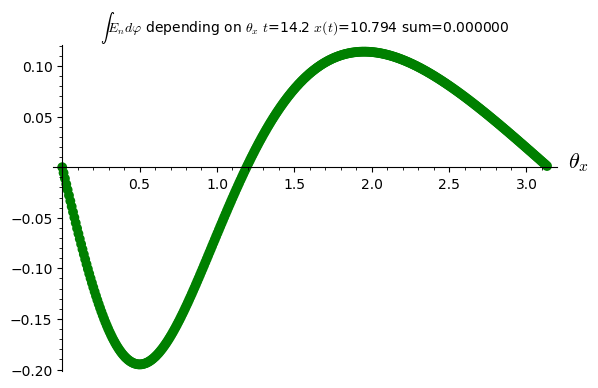

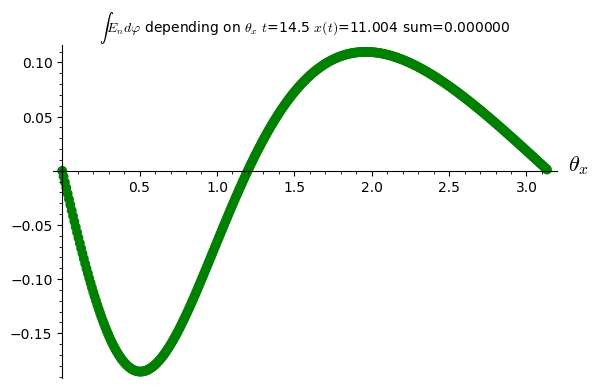

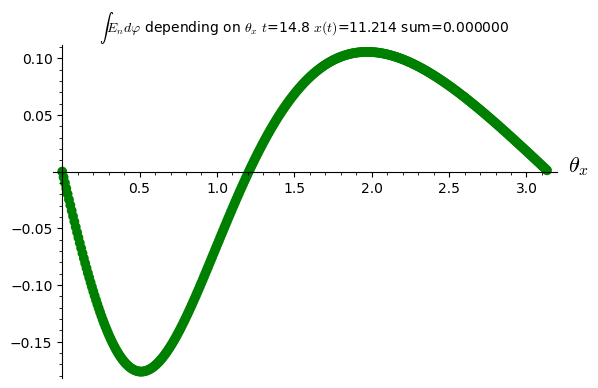

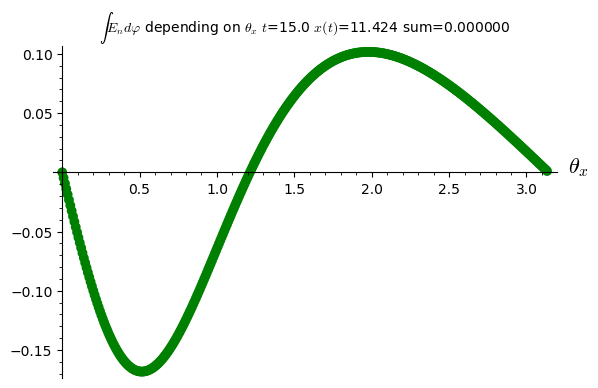

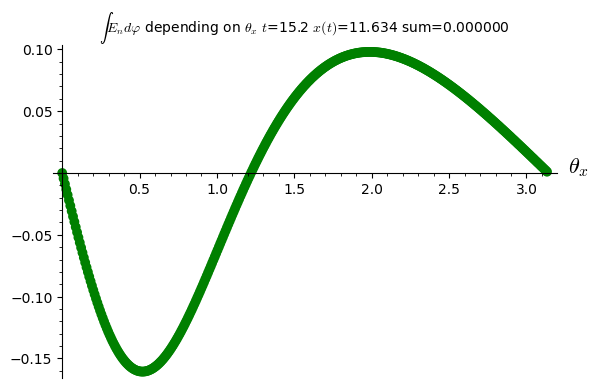

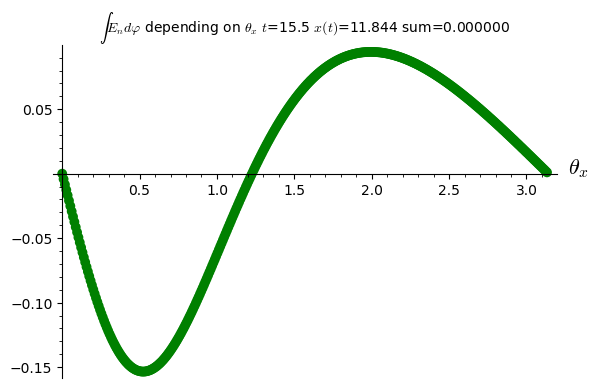

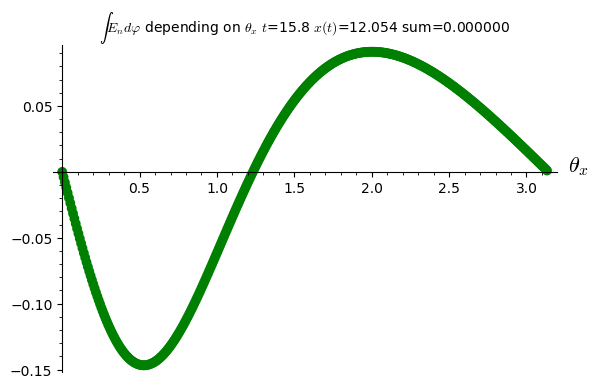

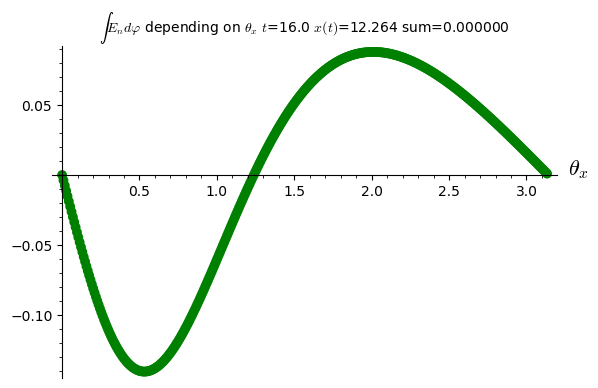

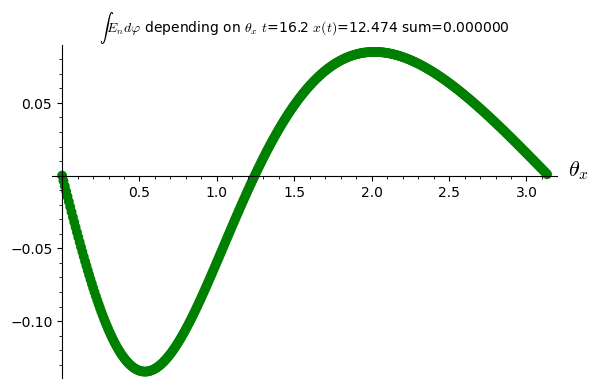

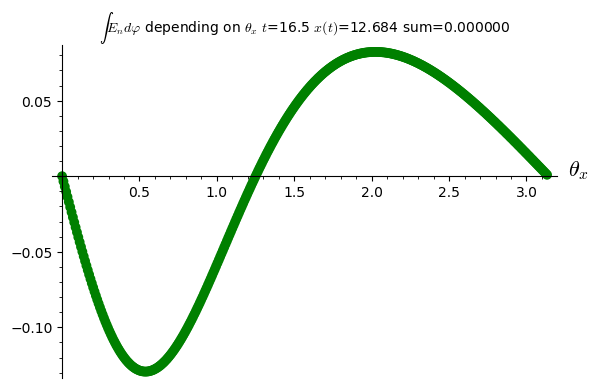

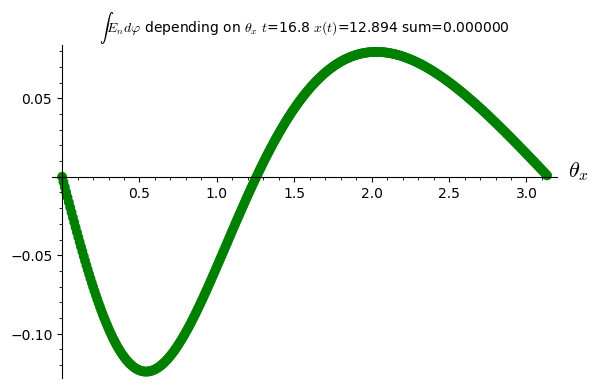

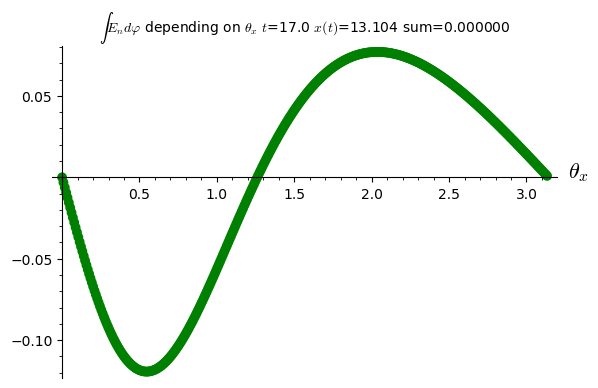

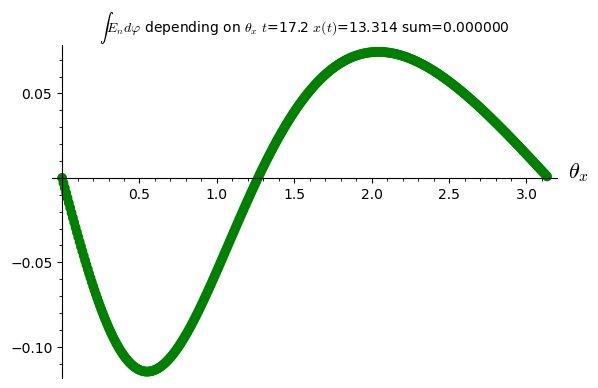

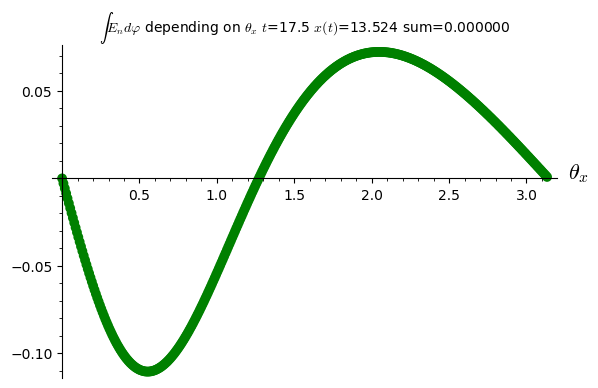

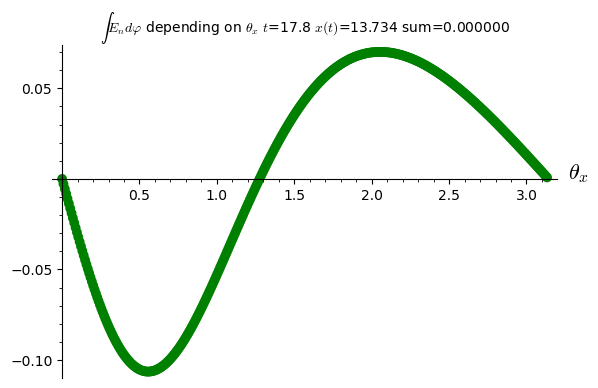

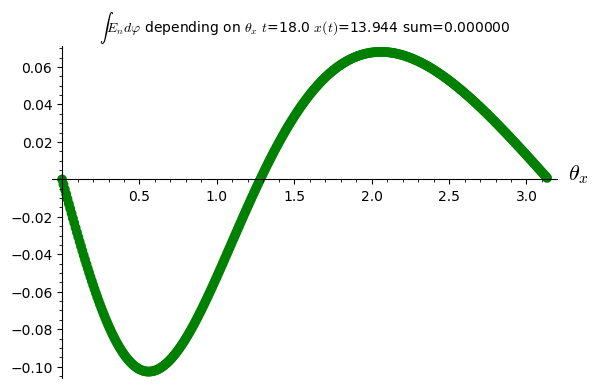

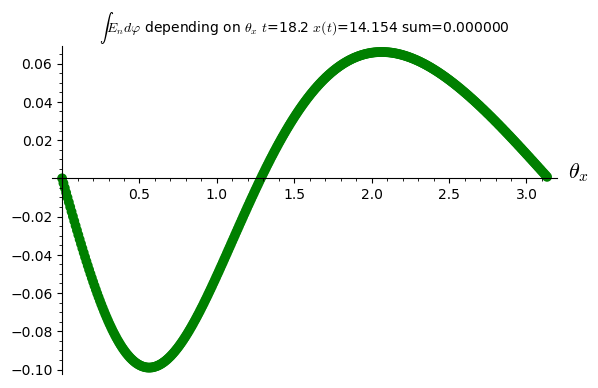

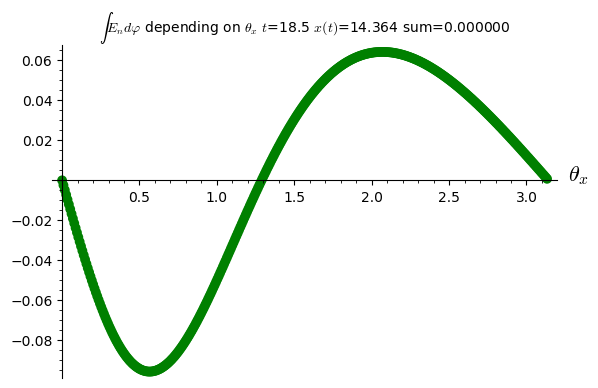

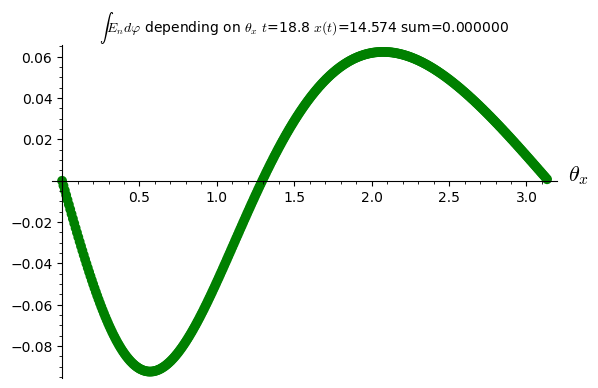

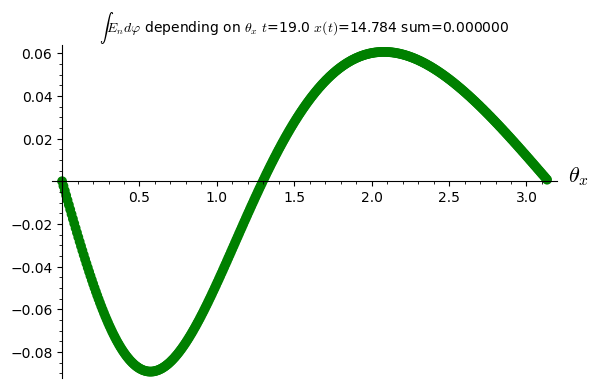

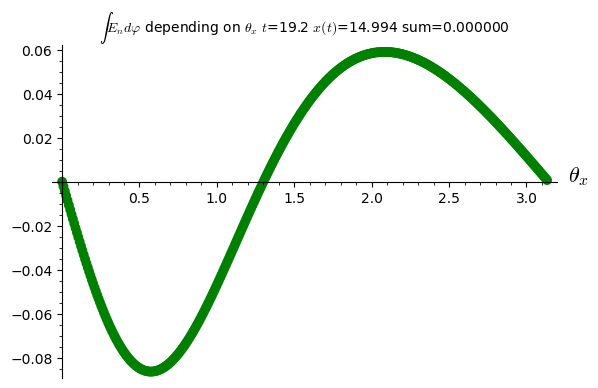

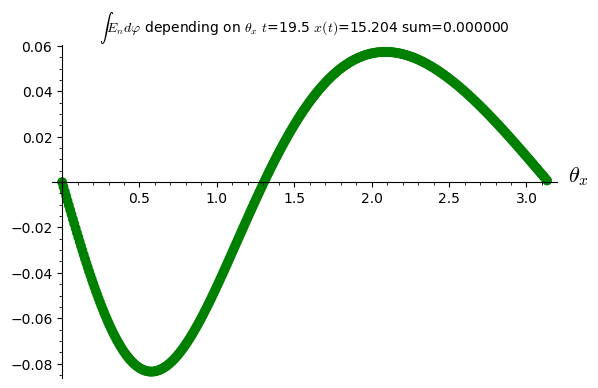

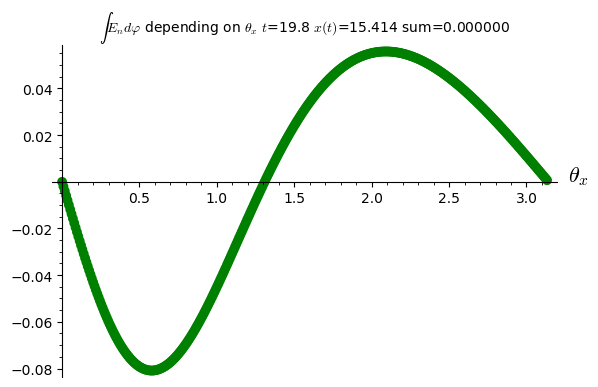

In [22]:
for ti in np.arange(0.00, 20, 0.25):
    
    theta_x_En_x = []
    intsum = 0.0
    for i in range(0, theta_x_steps_number):
        theta_x_i = i * dtheta_x
        en_x = En_x_theta(theta_x_i, ti)
        #print(theta_x_i, poyting_x)
        theta_x_En_x += [(theta_x_i, en_x[0])]
        intsum += dtheta_x * en_x[0]
        
    intsum /= (4*pi).n()

    p  = list_plot(theta_x_En_x, color="green", pointsize=50)
    #p += plot(get_omega()^4 * get_R_r()^2 * sin(x)^3/(get_c()^3),x,0,pi, color="blue")
    p.show(title="$\\int E_n d\\varphi$ depending on $\\theta_x$ $t$=%0.1f $x(t)$=%0.3f sum=%f" % (ti, get_sx(ti), intsum),
          axes_labels=["$\\theta_x$", ""])